In [261]:
# imports for basic data handling and numeric computations
import numpy as np
import pandas as pd

# import the EDA helper functions
from datascienceutils import DataScienceUtils as dsu

import seaborn as sns
import matplotlib.pyplot as plt

# import one-hot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# import libraries necessary for imputing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [262]:
# read in the training set

#travel train set
df_travel_train: pd.DataFrame = pd.read_csv('Data/Traveldata_train.csv')

#survey train set
df_survey_train: pd.DataFrame = pd.read_csv('Data/Surveydata_train.csv')

#read in the test set

#travel test set
df_travel_test: pd.DataFrame = pd.read_csv('Data/Traveldata_test.csv')

#survery test set
df_survey_test: pd.DataFrame = pd.read_csv('Data/Surveydata_test.csv')

# Data Inspection

In [223]:
# inspect the travel df
df_travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [158]:
dsu.inspect_variable_values(df_travel_train)

1. ID 

Data type: int64
Number of distinct values: 94379
Percentage of entries null: 0.0
Values taken on by the variable: Range: 98800001 - 98894379 


2. Gender 

Data type: object
Number of distinct values: 3
Percentage of entries null: 0.0816525630421412
Values taken on by the variable: ['Female' 'Male' nan] 


3. Customer_Type 

Data type: object
Number of distinct values: 3
Percentage of entries null: 10.477829283139018
Values taken on by the variable: ['Loyal Customer' 'Disloyal Customer' nan] 


4. Age 

Data type: float64
Number of distinct values: 76
Percentage of entries null: 0.0349776355118394
Values taken on by the variable: Range: nan - nan 


5. Type_Travel 

Data type: object
Number of distinct values: 3
Percentage of entries null: 10.834615339447817
Values taken on by the variable: [nan 'Personal Travel' 'Business Travel'] 


6. Travel_Class 

Data type: object
Number of distinct values: 2
Percentage of entries null: 0.0
Values taken on by the variable: ['Business' 'E

In [159]:
# inspect the survey data dataframe
df_survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [160]:
# inspect the values of the variables in the survey data dataset
dsu.inspect_variable_values(df_survey_train)

1. ID 

Data type: int64
Number of distinct values: 94379
Percentage of entries null: 0.0
Values taken on by the variable: Range: 98800001 - 98894379 


2. Overall_Experience 

Data type: int64
Number of distinct values: 2
Percentage of entries null: 0.0
Values taken on by the variable: [0 1] 


3. Seat_Comfort 

Data type: object
Number of distinct values: 7
Percentage of entries null: 0.06467482346953922
Values taken on by the variable: ['Needs Improvement' 'Poor' 'Acceptable' 'Good' 'Excellent'
 'Extremely Poor' nan] 


4. Seat_Class 

Data type: object
Number of distinct values: 2
Percentage of entries null: 0.0
Values taken on by the variable: ['Green Car' 'Ordinary'] 


5. Arrival_Time_Convenient 

Data type: object
Number of distinct values: 7
Percentage of entries null: 10.450678182307575
Values taken on by the variable: ['Excellent' 'Needs Improvement' 'Acceptable' nan 'Good' 'Poor'
 'Extremely Poor'] 


6. Catering 

Data type: object
Number of distinct values: 7
Percentage o

## Merging the Datasets

In [263]:
# we need to merge the two datasets

df_train: pd.DataFrame = pd.merge(df_travel_train, df_survey_train, how='inner', on=['ID'])

df_assessment: pd.DataFrame = pd.merge(df_travel_test, df_survey_test, how='inner', on=['ID'])

In [162]:
# inspect the columns of the new dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [163]:
# inspect the variables of the merged dataframe

dsu.inspect_variable_values(df_train)

1. ID 

Data type: int64
Number of distinct values: 94379
Percentage of entries null: 0.0
Values taken on by the variable: Range: 98800001 - 98894379 


2. Gender 

Data type: object
Number of distinct values: 3
Percentage of entries null: 0.0816525630421412
Values taken on by the variable: ['Female' 'Male' nan] 


3. Customer_Type 

Data type: object
Number of distinct values: 3
Percentage of entries null: 10.477829283139018
Values taken on by the variable: ['Loyal Customer' 'Disloyal Customer' nan] 


4. Age 

Data type: float64
Number of distinct values: 76
Percentage of entries null: 0.0349776355118394
Values taken on by the variable: Range: nan - nan 


5. Type_Travel 

Data type: object
Number of distinct values: 3
Percentage of entries null: 10.834615339447817
Values taken on by the variable: [nan 'Personal Travel' 'Business Travel'] 


6. Travel_Class 

Data type: object
Number of distinct values: 2
Percentage of entries null: 0.0
Values taken on by the variable: ['Business' 'E

In [264]:
# split variables by type for EDA
numerical_vars, categorical_vars, binary_vars = dsu.get_vars_by_type(df_train)

In [265]:
print(numerical_vars, '\n', categorical_vars, '\n', binary_vars)

['ID', 'Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'] 
 ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding'] 
 ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Overall_Experience', 'Seat_Class']


In [268]:
# store the name of the target for later use
target = "Overall_Experience"
#binary_vars.remove(target)

# EDA

## Univariate Analysis

### Numerical Variables

C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


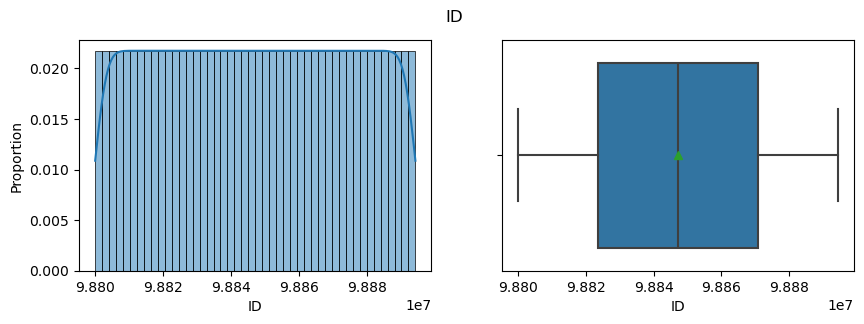

Summary statistics for the ID variable 

count    9.437900e+04
mean     9.884719e+07
std      2.724501e+04
min      9.880000e+07
25%      9.882360e+07
50%      9.884719e+07
75%      9.887078e+07
max      9.889438e+07
Name: ID, dtype: float64 


C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


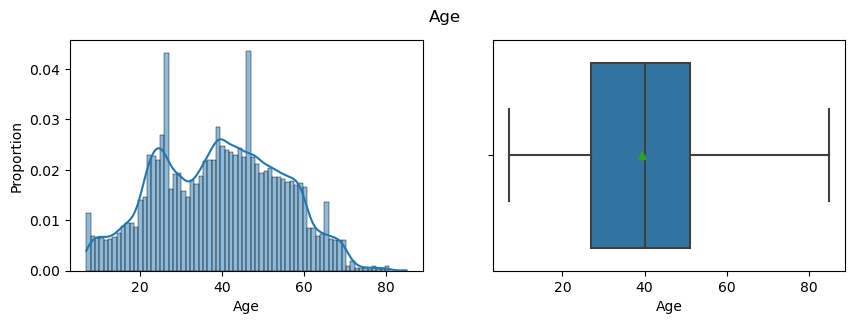

Summary statistics for the Age variable 

count    94346.000000
mean        39.419647
std         15.116632
min          7.000000
25%         27.000000
50%         40.000000
75%         51.000000
max         85.000000
Name: Age, dtype: float64 


C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


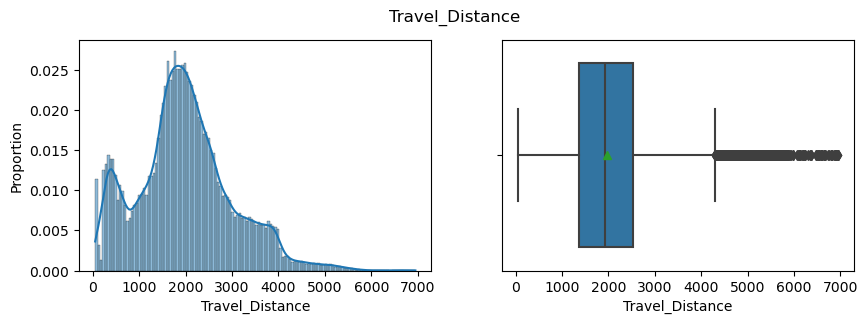

Summary statistics for the Travel_Distance variable 

count    94379.000000
mean      1978.888185
std       1027.961019
min         50.000000
25%       1359.000000
50%       1923.000000
75%       2538.000000
max       6951.000000
Name: Travel_Distance, dtype: float64 


C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


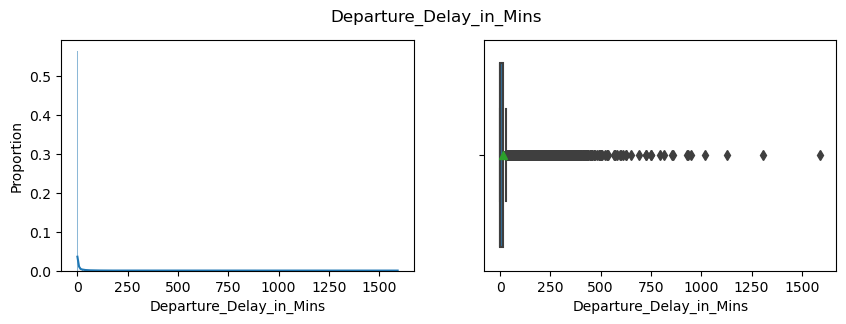

Summary statistics for the Departure_Delay_in_Mins variable 

count    94322.000000
mean        14.647092
std         38.138781
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max       1592.000000
Name: Departure_Delay_in_Mins, dtype: float64 


C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


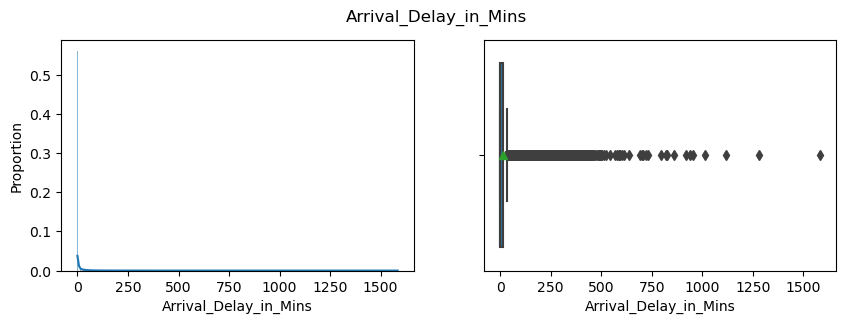

Summary statistics for the Arrival_Delay_in_Mins variable 

count    94022.000000
mean        15.005222
std         38.439409
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1584.000000
Name: Arrival_Delay_in_Mins, dtype: float64 


In [46]:
# analyze the numerical variables in the travel dataset
dsu.analyze_numerical_features(df_train, numerical_vars)

In [42]:
# inspect the correlations in the data
df_train[numerical_vars].corr()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Age,1.000000,-0.251570,-0.007973,-0.010610
Travel_Distance,-0.251570,1.000000,0.114174,0.111317
Departure_Delay_in_Mins,-0.007973,0.114174,1.000000,0.965483
Arrival_Delay_in_Mins,-0.010610,0.111317,0.965483,1.000000


### Categorical Variables

1. Analysis for Seat_Comfort: 


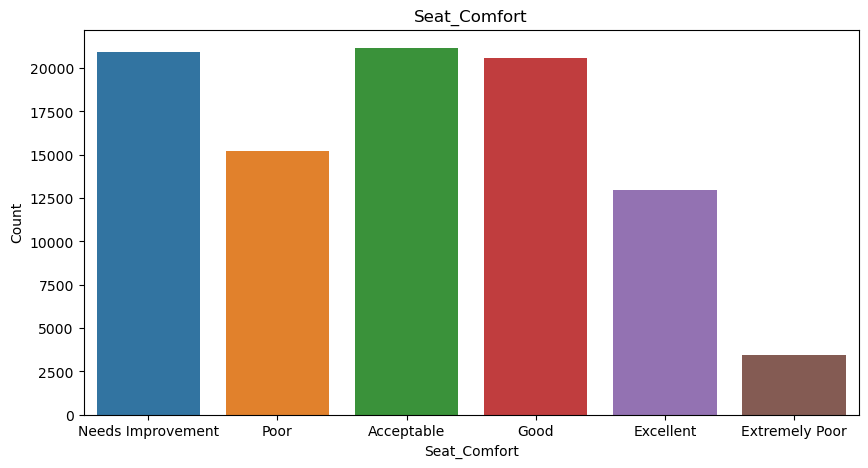

Seat_Comfort
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: proportion, dtype: float64 

2. Analysis for Arrival_Time_Convenient: 


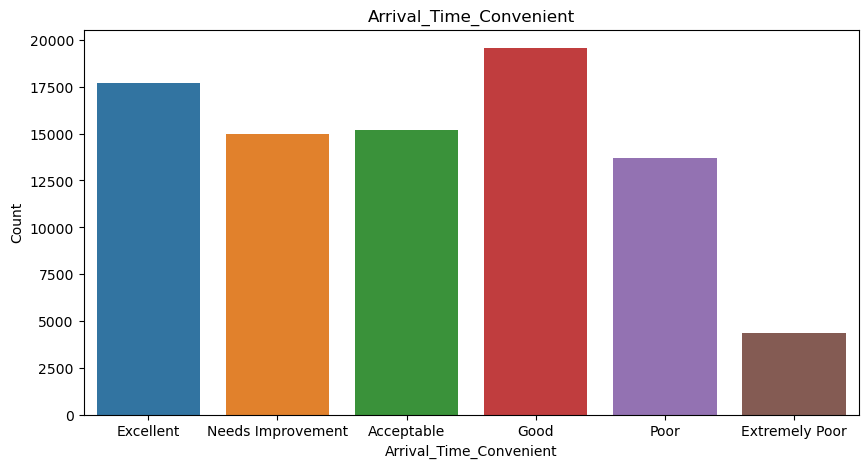

Arrival_Time_Convenient
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor                 0.160236
Extremely Poor       0.050697
Name: proportion, dtype: float64 

3. Analysis for Catering: 


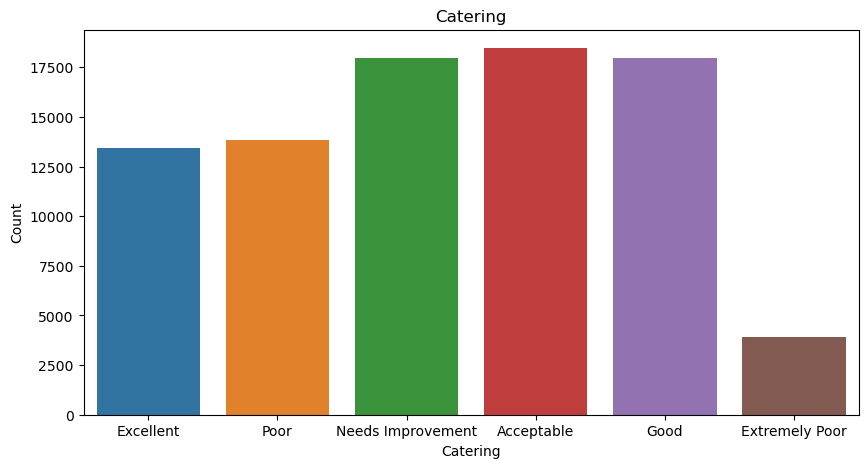

Catering
Acceptable           0.215652
Needs Improvement    0.209930
Good                 0.209825
Poor                 0.161821
Excellent            0.157115
Extremely Poor       0.045657
Name: proportion, dtype: float64 

4. Analysis for Platform_Location: 


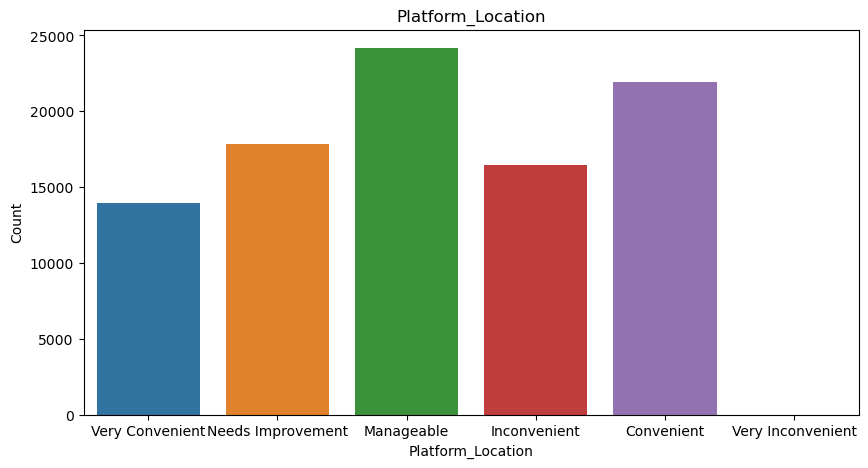

Platform_Location
Manageable           0.256208
Convenient           0.232244
Needs Improvement    0.189000
Inconvenient         0.174342
Very Convenient      0.148184
Very Inconvenient    0.000021
Name: proportion, dtype: float64 

5. Analysis for Onboard_Wifi_Service: 


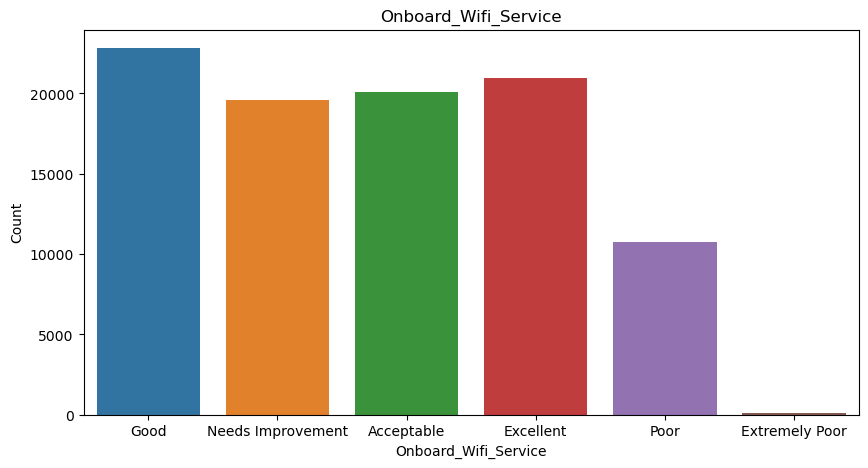

Onboard_Wifi_Service
Good                 0.242027
Excellent            0.222239
Acceptable           0.213230
Needs Improvement    0.207697
Poor                 0.113843
Extremely Poor       0.000965
Name: proportion, dtype: float64 

6. Analysis for Onboard_Entertainment: 


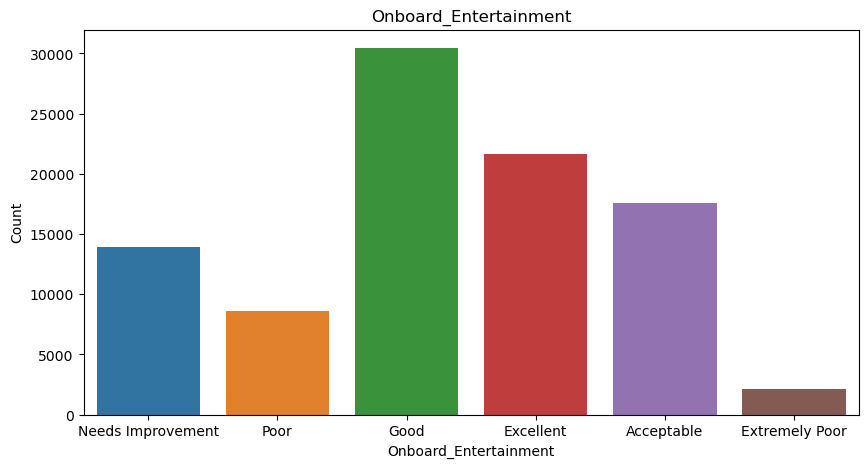

Onboard_Entertainment
Good                 0.322654
Excellent            0.229374
Acceptable           0.186094
Needs Improvement    0.147582
Poor                 0.091574
Extremely Poor       0.022721
Name: proportion, dtype: float64 

7. Analysis for Online_Support: 


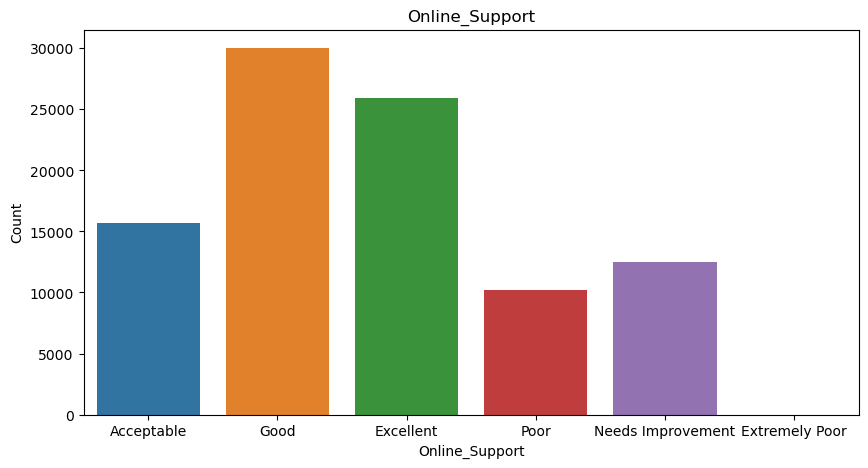

Online_Support
Good                 0.318344
Excellent            0.274627
Acceptable           0.166532
Needs Improvement    0.132657
Poor                 0.107829
Extremely Poor       0.000011
Name: proportion, dtype: float64 

8. Analysis for Ease_of_Online_Booking: 


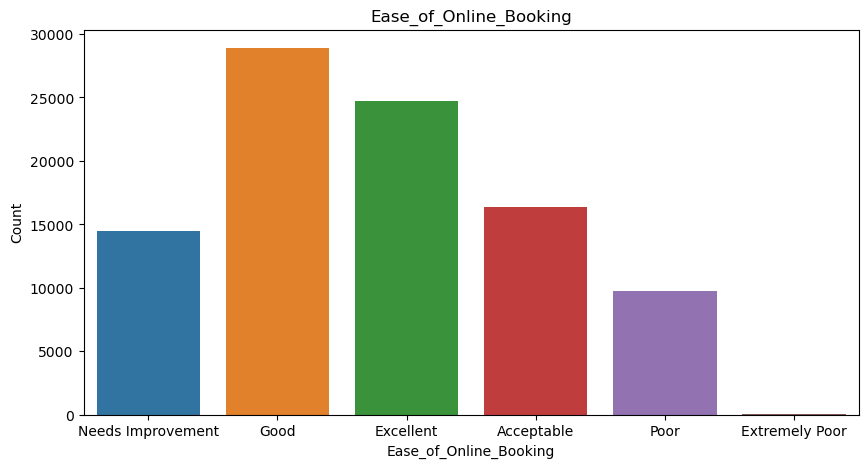

Ease_of_Online_Booking
Good                 0.306545
Excellent            0.262380
Acceptable           0.173796
Needs Improvement    0.153532
Poor                 0.103578
Extremely Poor       0.000170
Name: proportion, dtype: float64 

9. Analysis for Onboard_Service: 


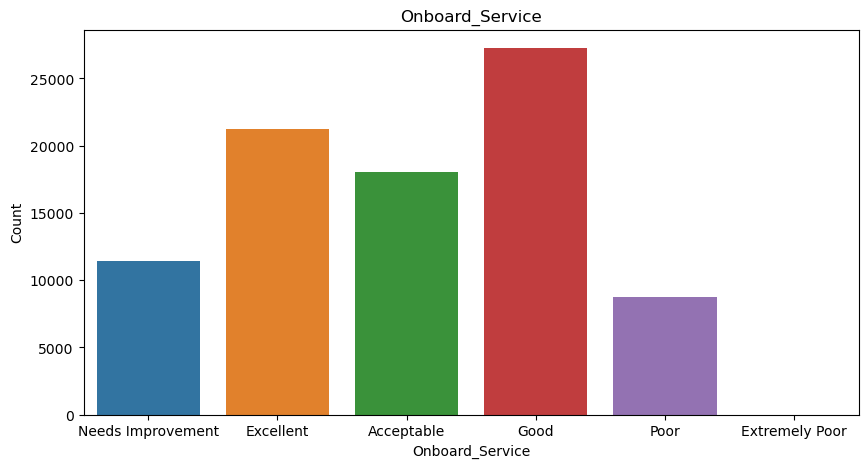

Onboard_Service
Good                 0.314193
Excellent            0.245131
Acceptable           0.208244
Needs Improvement    0.131254
Poor                 0.101132
Extremely Poor       0.000046
Name: proportion, dtype: float64 

10. Analysis for Legroom: 


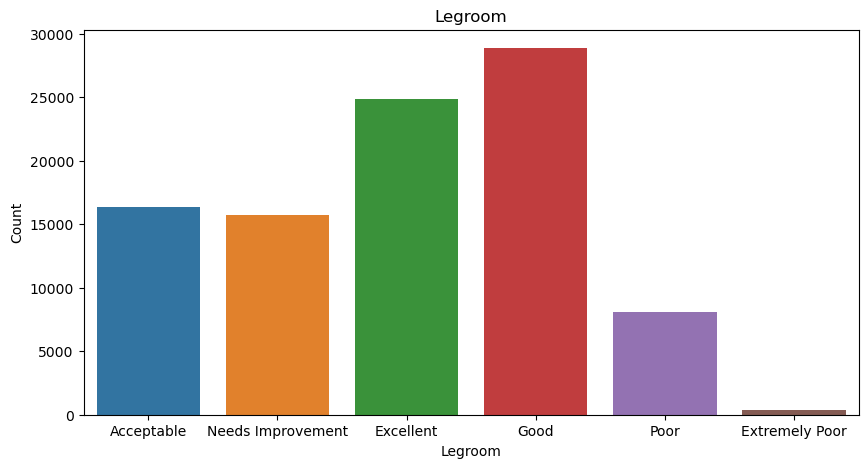

Legroom
Good                 0.306186
Excellent            0.263361
Acceptable           0.173764
Needs Improvement    0.167071
Poor                 0.086012
Extremely Poor       0.003606
Name: proportion, dtype: float64 

11. Analysis for Baggage_Handling: 


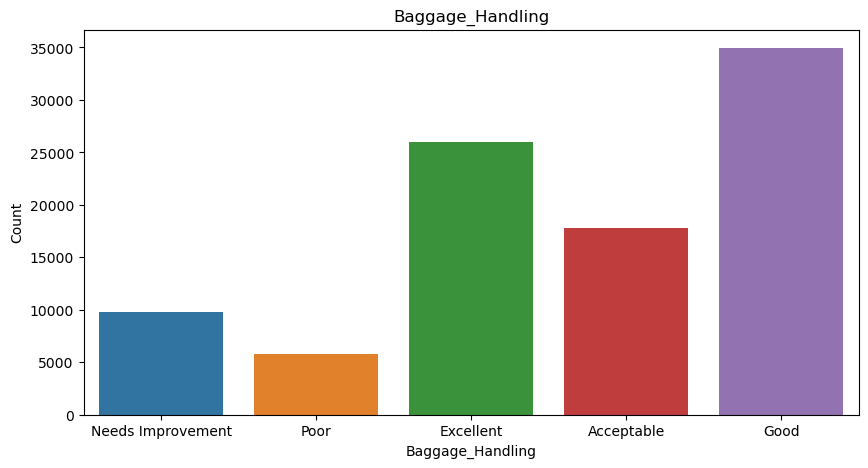

Baggage_Handling
Good                 0.370810
Excellent            0.275932
Acceptable           0.188535
Needs Improvement    0.103558
Poor                 0.061165
Name: proportion, dtype: float64 

12. Analysis for CheckIn_Service: 


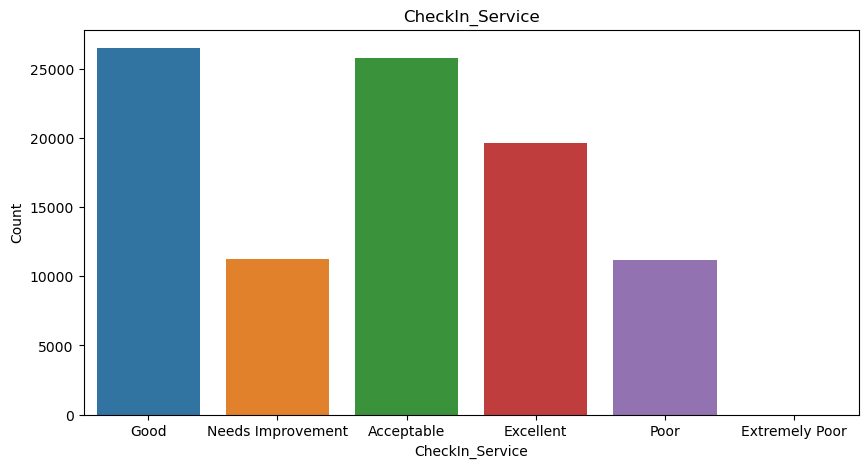

CheckIn_Service
Good                 0.281033
Acceptable           0.273621
Excellent            0.208278
Needs Improvement    0.118958
Poor                 0.118099
Extremely Poor       0.000011
Name: proportion, dtype: float64 

13. Analysis for Cleanliness: 


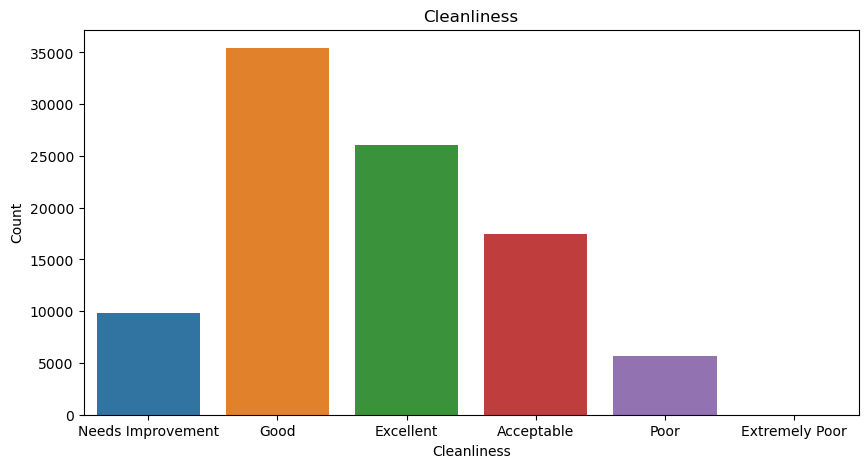

Cleanliness
Good                 0.375393
Excellent            0.276064
Acceptable           0.184894
Needs Improvement    0.103907
Poor                 0.059689
Extremely Poor       0.000053
Name: proportion, dtype: float64 

14. Analysis for Online_Boarding: 


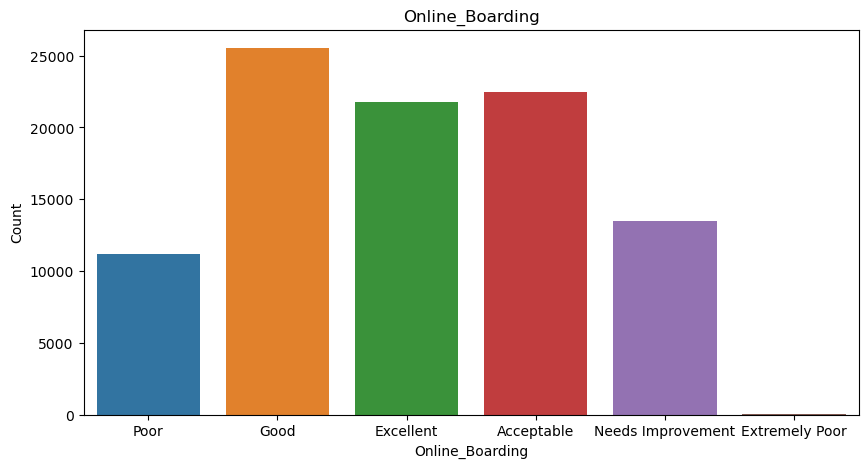

Online_Boarding
Good                 0.270554
Acceptable           0.238151
Excellent            0.230384
Needs Improvement    0.142530
Poor                 0.118254
Extremely Poor       0.000127
Name: proportion, dtype: float64 


In [47]:
# analyze the categorical variables of the travel dataset
dsu.analyze_categorical_features(df_train, categorical_vars)

### Binary Variables

0. Analysis for Gender:


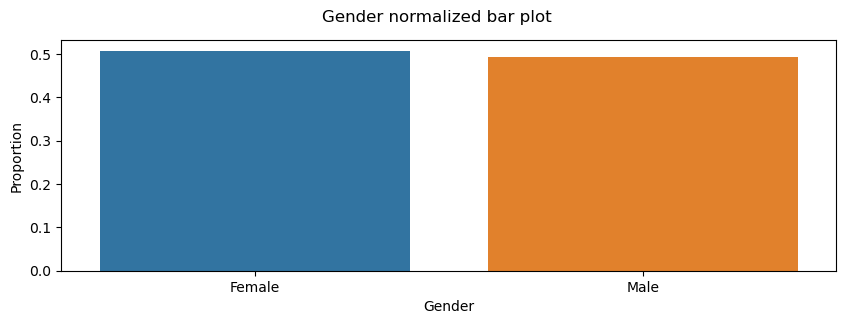

Gender
Female    0.507041
Male      0.492959
Name: proportion, dtype: float64
1. Analysis for Customer_Type:


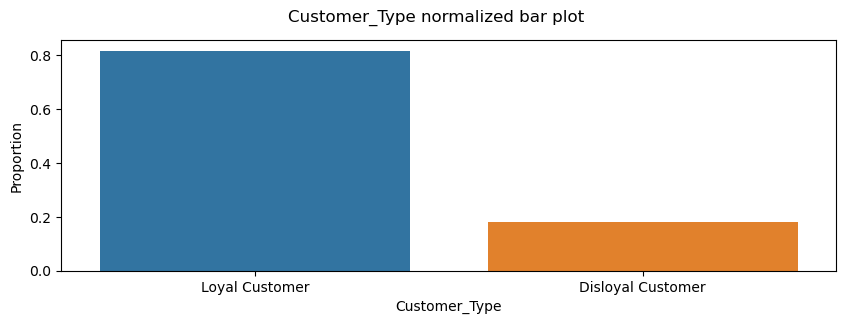

Customer_Type
Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: proportion, dtype: float64
2. Analysis for Type_Travel:


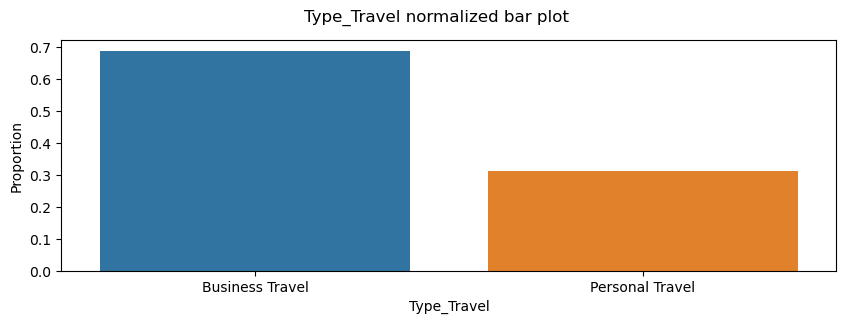

Type_Travel
Business Travel    0.688373
Personal Travel    0.311627
Name: proportion, dtype: float64
3. Analysis for Travel_Class:


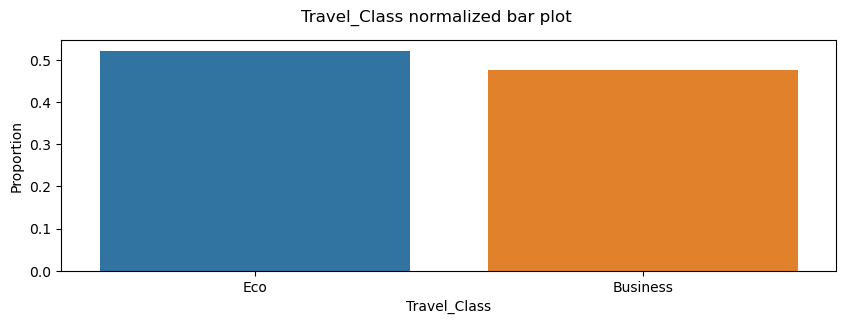

Travel_Class
Eco         0.522807
Business    0.477193
Name: proportion, dtype: float64
4. Analysis for Overall_Experience:


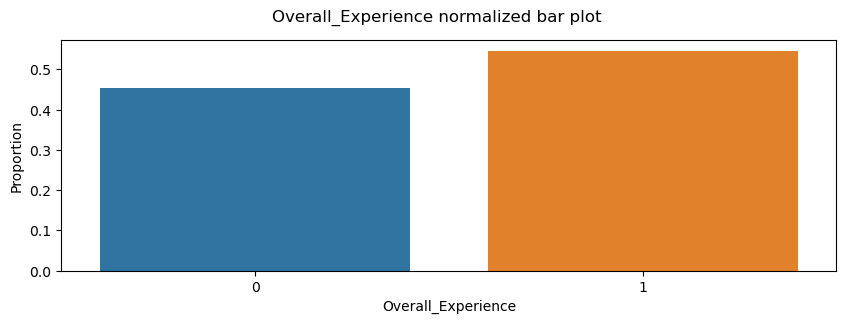

Overall_Experience
1    0.546658
0    0.453342
Name: proportion, dtype: float64
5. Analysis for Seat_Class:


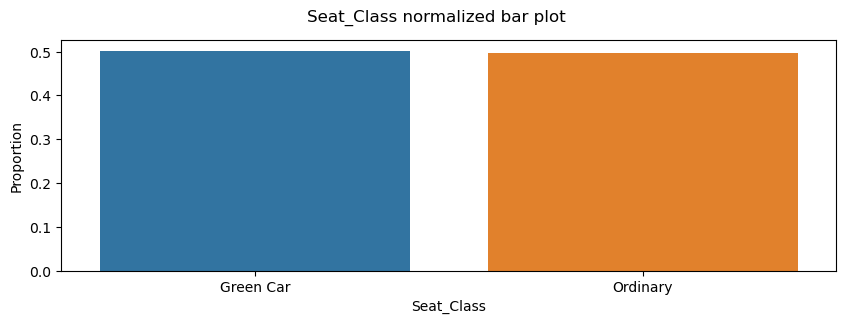

Seat_Class
Green Car    0.502601
Ordinary     0.497399
Name: proportion, dtype: float64


In [48]:
# analyze the binary variables
dsu.analyze_binary_features(df_train, binary_vars)

### Analysis

**Gender**: The distribution of Males vs Females in the dataset is almost uniform.

**Customer Type:** Most customers (~82%) are loyal customers, with 18% being non-loyal customers.

**Type Travel:** Approximately 68% of customers are travelling for business purposes. The other 32% are travelling for personal reasons. 

**Travel Class:** The travel classes (economy and business) have very similar distributions. Slightly more individuals (52%) travel on economy flights, with the other 48% travelling on business.

**Overall Experience.** Approximately 55% (45% dissatisfied) of customers are satisfied with their travel experience.

**Seat Class:** The values in the Seat Class variable (Green Car, Ordinary) have almost identical distributions.

## Bivariate Analysis

### Numerical Variables

C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


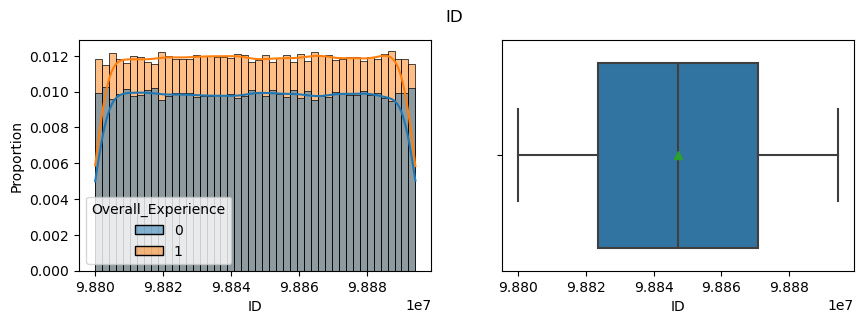

Comparison of the summary statistics for paying and non-paying customers for the ID variable 

               ID_0          ID_1
count  4.278600e+04  5.159300e+04
mean   9.884714e+07  9.884723e+07
std    2.729144e+04  2.720665e+04
min    9.880000e+07  9.880000e+07
25%    9.882344e+07  9.882373e+07
50%    9.884715e+07  9.884721e+07
75%    9.887085e+07  9.887074e+07
max    9.889438e+07  9.889438e+07 


C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


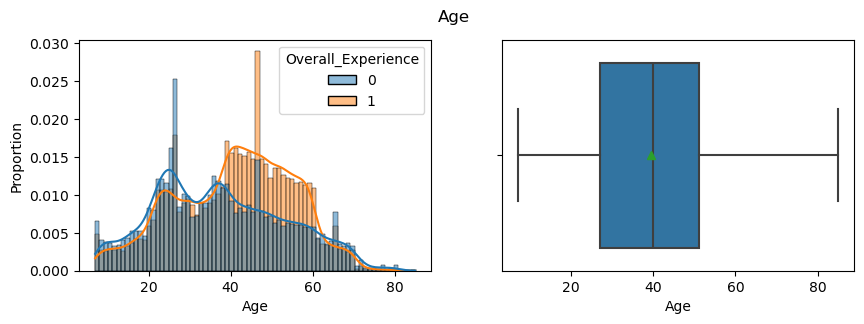

Comparison of the summary statistics for paying and non-paying customers for the Age variable 

              Age_0         Age_1
count  42770.000000  51576.000000
mean      37.490180     41.019680
std       15.900432     14.237602
min        7.000000      7.000000
25%       25.000000     30.000000
50%       36.000000     42.000000
75%       49.000000     52.000000
max       85.000000     85.000000 


C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


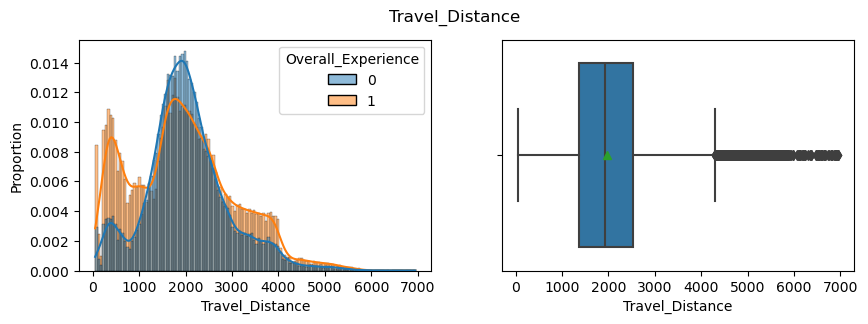

Comparison of the summary statistics for paying and non-paying customers for the Travel_Distance variable 

       Travel_Distance_0  Travel_Distance_1
count       42786.000000       51593.000000
mean         2025.826088        1939.962650
std           890.514308        1127.855177
min            50.000000          50.000000
25%          1520.000000        1065.000000
50%          1953.500000        1882.000000
75%          2459.000000        2619.000000
max          6951.000000        6950.000000 


C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


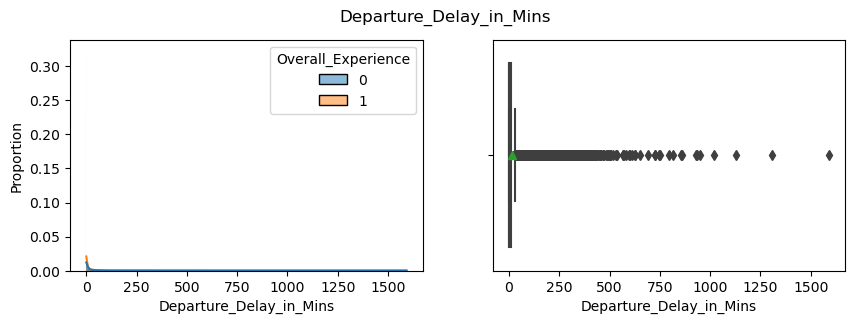

Comparison of the summary statistics for paying and non-paying customers for the Departure_Delay_in_Mins variable 

       Departure_Delay_in_Mins_0  Departure_Delay_in_Mins_1
count                42762.00000               51560.000000
mean                    17.73860                  12.083107
std                     43.30726                  33.029879
min                      0.00000                   0.000000
25%                      0.00000                   0.000000
50%                      0.00000                   0.000000
75%                     16.00000                   9.000000
max                   1592.00000                1305.000000 


C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


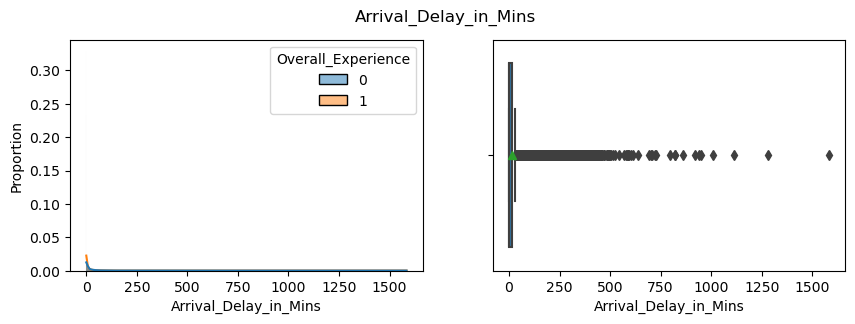

Comparison of the summary statistics for paying and non-paying customers for the Arrival_Delay_in_Mins variable 

       Arrival_Delay_in_Mins_0  Arrival_Delay_in_Mins_1
count             42620.000000             51402.000000
mean                 18.392374                12.196763
std                  43.529899                33.380282
min                   0.000000                 0.000000
25%                   0.000000                 0.000000
50%                   0.000000                 0.000000
75%                  18.000000                 9.000000
max                1584.000000              1280.000000 


In [49]:
# bivariate analysis of numerical features
dsu.analyze_numerical_features(df_train, numerical_vars, bivariate=True, target=target)

### Categorical Variables

In [7]:
df_train[target] = df_train[target].astype(str)

Bivariate EDA for Seat_Comfort:  


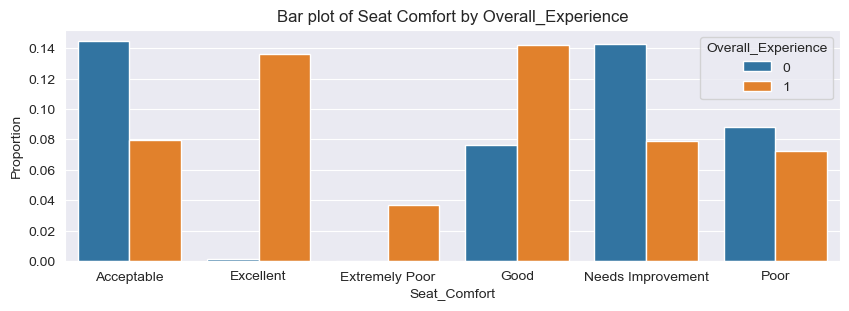

Bivariate EDA for Arrival_Time_Convenient:  


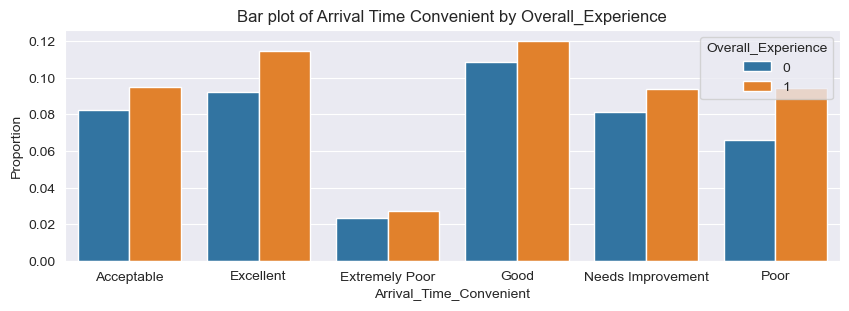

Bivariate EDA for Catering:  


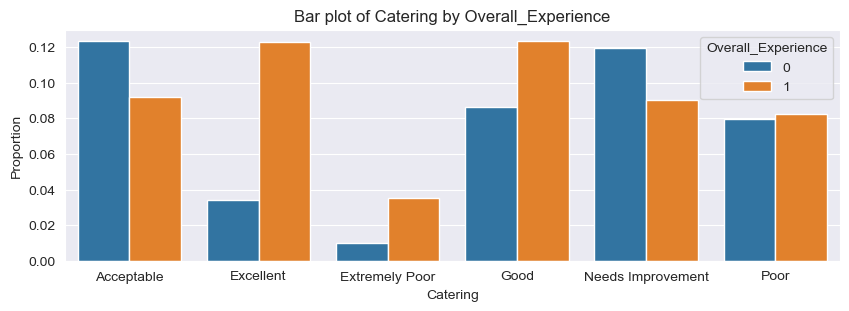

Bivariate EDA for Platform_Location:  


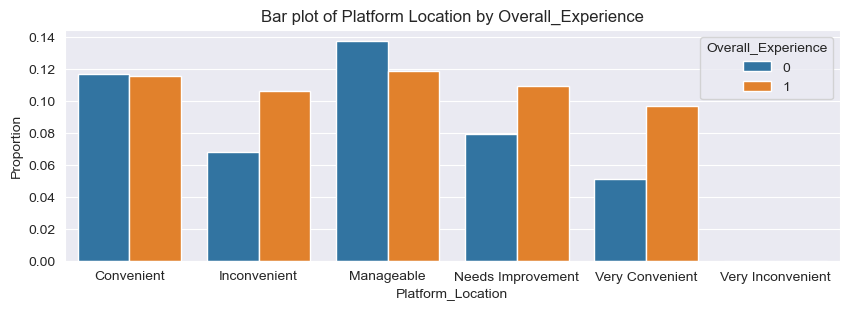

Bivariate EDA for Onboard_Wifi_Service:  


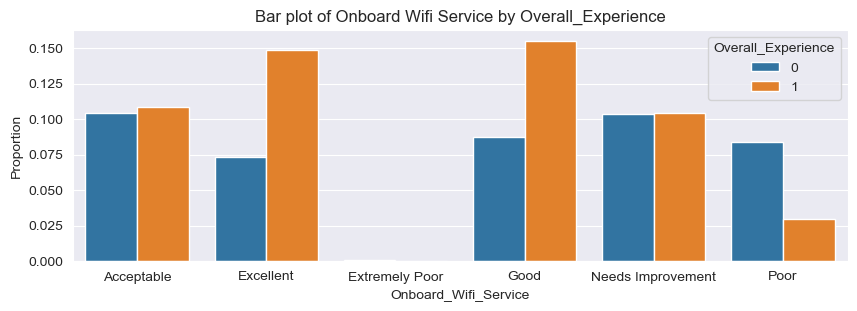

Bivariate EDA for Onboard_Entertainment:  


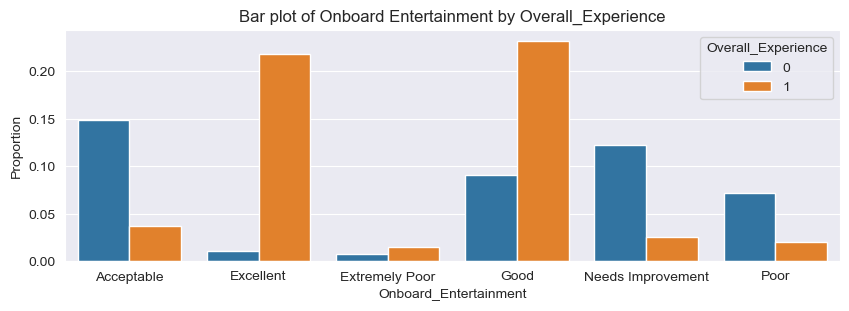

Bivariate EDA for Online_Support:  


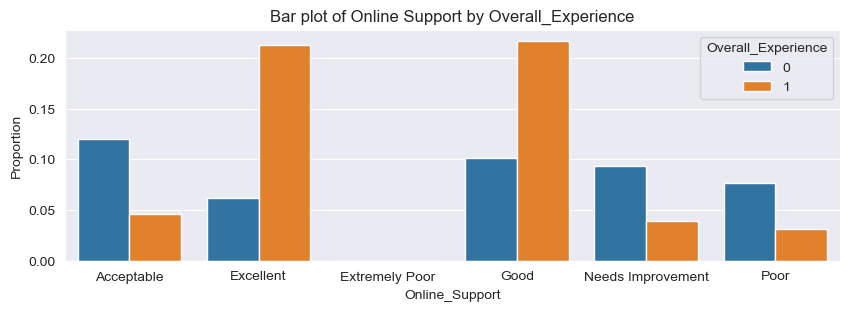

Bivariate EDA for Ease_of_Online_Booking:  


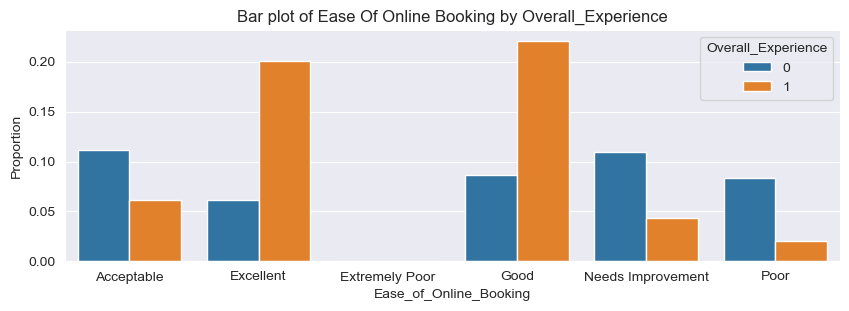

Bivariate EDA for Onboard_Service:  


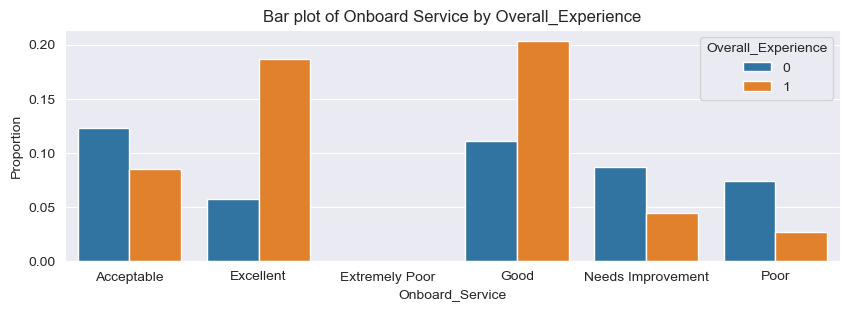

Bivariate EDA for Legroom:  


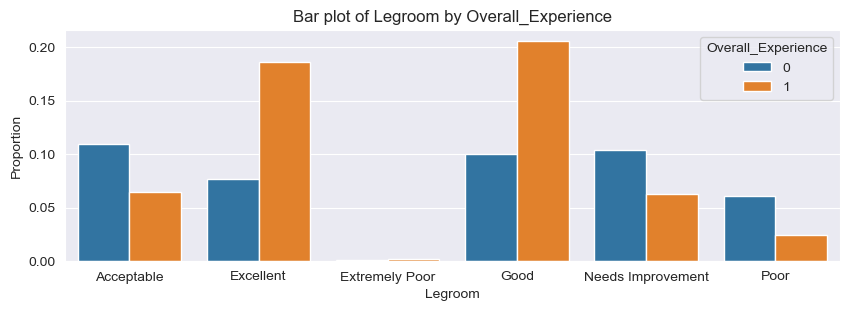

Bivariate EDA for Baggage_Handling:  


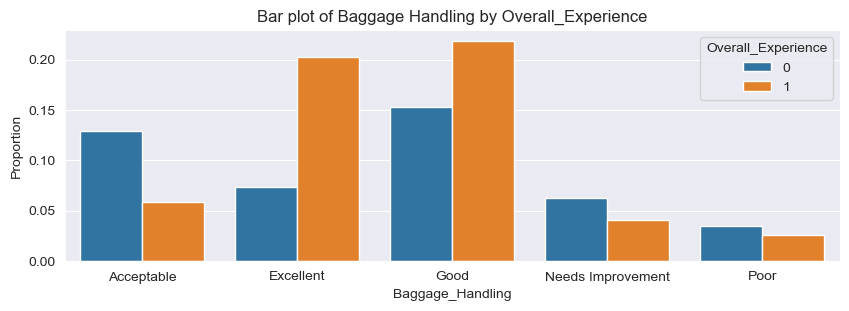

Bivariate EDA for CheckIn_Service:  


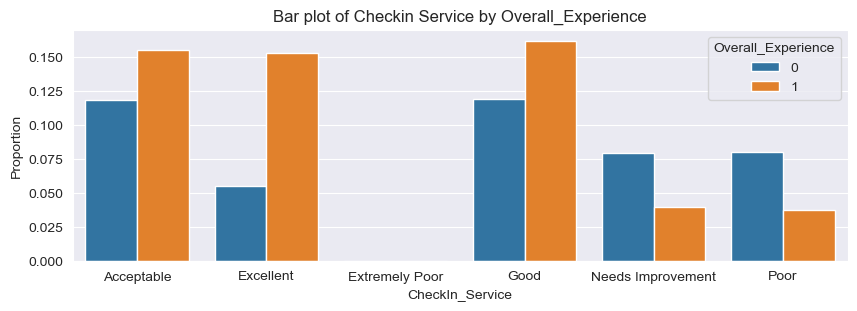

Bivariate EDA for Cleanliness:  


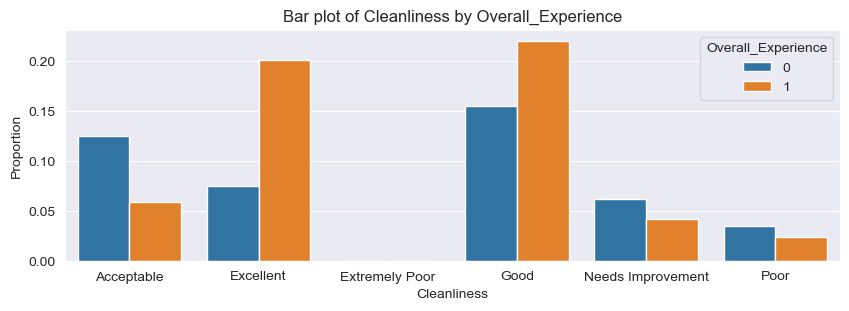

Bivariate EDA for Online_Boarding:  


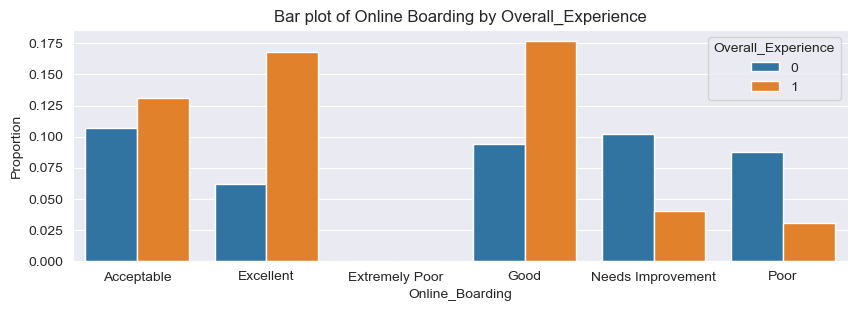

In [8]:
# analyze the categorical vars
dsu.analyze_categorical_features(df_train, categorical_vars, bivariate=True, target=target)

### Analysis

The categorical are all ordinal in nature. 

The ranking systems from extremely poor to excellent demonstrate that in most cases, poor ratings lead to dissatisfied consumers.

### Binary Variables

Bivariate EDA for Gender:  


AttributeError: 'int' object has no attribute 'startswith'

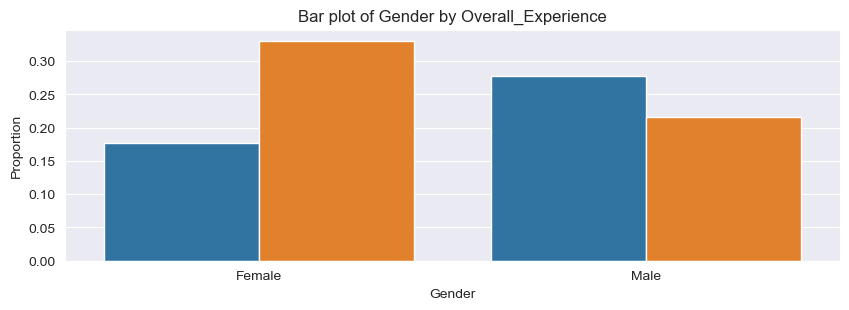

In [167]:
# analyze the binary features

# remove the target from the list of variables
binary_vars.remove(target)

# inspect the distribution
dsu.analyze_categorical_features(df_train, binary_vars, bivariate=True, target=target)

### Analysis:

Seat Class: The distribution of the values of the Seat Class variable are identical and therefore not relevant for the analysis. 

Travel Class: Clearly customers who travel in the business class show higher satisfaction rates, while consumers travelling economy are more likely to be dissatisfied.



# Data Preprocessing:

## Drop Irrelevant Columns

In [269]:
# drop columns that have no value
df_train.drop(columns=["ID", "Seat_Class"], inplace=True)
df_assessment.drop(columns=["ID", "Seat_Class"], inplace=True)

# and remove from the list
numerical_vars.remove("ID")
binary_vars.remove("Seat_Class")

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   Customer_Type            85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   Type_Travel              85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94322 non-null  float64
 7   Arrival_Delay_in_Mins    94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_Comfort             94318 non-null  object 
 10  Arrival_Time_Convenient  85449 non-null  object 
 11  Catering                 85638 non-null  object 
 12  Platform_Location        94349 non-null  object 
 13  Onboard_Wifi_Service     94349 non-null  object 
 14  Onboard_Entertainment 

## Impute Missing Data

In [96]:
# columns with missing data
df_train.isna().sum()

Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

### Imputation of numerical variables

In [270]:
# initialize the IterativeImputer instance
numeric_imputer: IterativeImputer = IterativeImputer(random_state=1)

# fit the test data to the imputer
numeric_imputer.fit(df_train[numerical_vars])

# transform the test data
df_train[numerical_vars] = numeric_imputer.transform(df_train[numerical_vars])

# impute values of dt_assessment also
df_assessment[numerical_vars] = numeric_imputer.transform(df_assessment[numerical_vars])

In [170]:
# test that there are no more nulls
df_train[numerical_vars].isna().sum()

Age                        0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


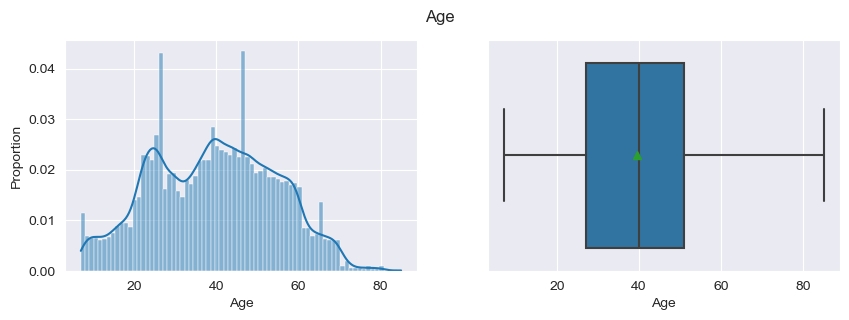

Summary statistics for the Age variable 

count    94379.000000
mean        39.419719
std         15.114187
min          7.000000
25%         27.000000
50%         40.000000
75%         51.000000
max         85.000000
Name: Age, dtype: float64 


C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


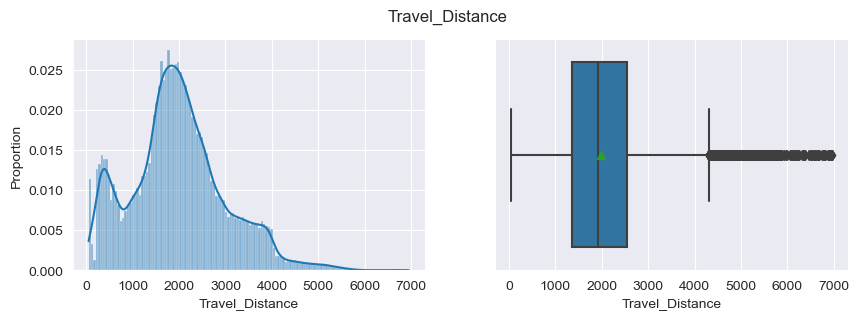

Summary statistics for the Travel_Distance variable 

count    94379.000000
mean      1978.888185
std       1027.961019
min         50.000000
25%       1359.000000
50%       1923.000000
75%       2538.000000
max       6951.000000
Name: Travel_Distance, dtype: float64 


C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


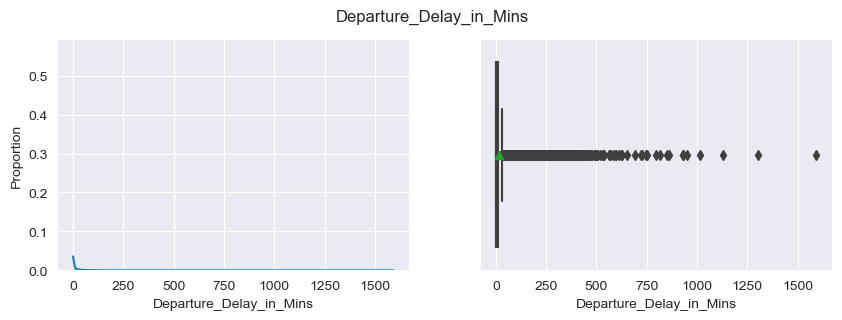

Summary statistics for the Departure_Delay_in_Mins variable 

count    94379.000000
mean        14.647180
std         38.127266
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max       1592.000000
Name: Departure_Delay_in_Mins, dtype: float64 


C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


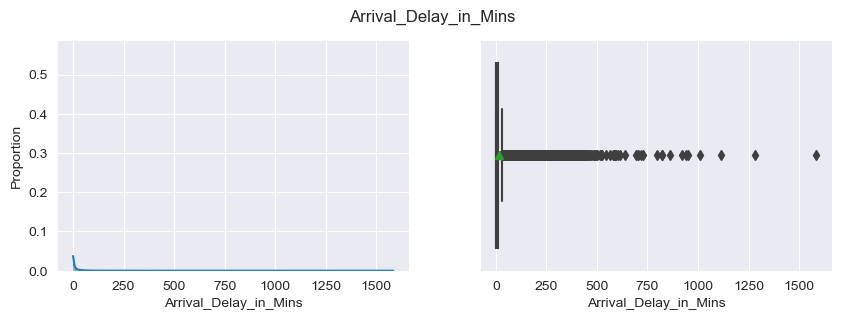

Summary statistics for the Arrival_Delay_in_Mins variable 

count    94379.000000
mean        15.077376
std         38.573852
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1584.000000
Name: Arrival_Delay_in_Mins, dtype: float64 


In [99]:
# inspect the distribution of the data for significant changes
dsu.analyze_numerical_features(df_train, numerical_vars)

## Encoding Categorical and Binary Variables

### Encoding the categorical variables

We cant impute missing values until the categorical variables have been encoded.

In [271]:
# initialize the mapping
# encode the categorical columns

loc = 'Platform_Location'

mapping_dict_loc = {'Very Convenient': int(6), 'Needs Improvement': int(3), 'Manageable': int(4), 'Inconvenient': int(2),
 'Convenient': int(5), 'Very Inconvenient': int(1)}

categorical_vars.remove(loc)

#dictionary to map the ordinal categories of the categorical variables
mapping_dict = {'Needs Improvement': int(2),  'Poor': int(1),  'Excellent': int(5), 'Acceptable': int(3), 'Good': int(4)}

# map each col in the categorical vars
for col in categorical_vars:
    df_train[col] = df_train[col].map(mapping_dict)
    df_assessment[col] = df_assessment[col].map(mapping_dict)

# mapp the Platform_Location 
df_train[loc] = df_train[loc].map(mapping_dict_loc)
df_assessment[loc] = df_assessment[loc].map(mapping_dict_loc)

In [101]:
# inspect the values of the encoded columns
dsu.inspect_variable_values(df_train[categorical_vars])

1. Seat_Comfort 

Data type: float64
Number of distinct values: 6
Percentage of entries null: 3.8787078311595398
Values taken on by the variable: [ 2.  1.  3.  4.  5. nan] 


2. Arrival_Time_Convenient 

Data type: float64
Number of distinct values: 6
Percentage of entries null: 16.349223960452186
Values taken on by the variable: [ 5.  2.  3. nan  4.  1.] 


3. Catering 

Data type: float64
Number of distinct values: 6
Percentage of entries null: 15.479395066562255
Values taken on by the variable: [ 5.  1.  2. nan  3.  4.] 


4. Onboard_Wifi_Service 

Data type: float64
Number of distinct values: 6
Percentage of entries null: 0.12837106664686287
Values taken on by the variable: [ 4.  2.  3.  5.  1. nan] 


5. Onboard_Entertainment 

Data type: float64
Number of distinct values: 6
Percentage of entries null: 2.3444701085483155
Values taken on by the variable: [ 2.  1.  4.  5.  3. nan] 


6. Online_Support 

Data type: float64
Number of distinct values: 6
Percentage of entries null: 0.09

In [ ]:
# check the distribution of the data after imputing

dsu.analyze_categorical_features(df_train, categorical_vars)

### Encoding Binary Variables

In [272]:
# initialize the one-hot encoder
binary_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# mask to get nan values back to nan after encoding
nan_mask = df_train[binary_vars].isna()
nan_mask_assessment = df_assessment[binary_vars].isna()

# fit to the encoder
binary_encoder.fit(df_train[binary_vars])

# transform values to 0s and 1s
df_train[binary_vars] = binary_encoder.transform(df_train[binary_vars])

df_assessment[binary_vars] = binary_encoder.transform(df_assessment[binary_vars])

# reassign binary vars
df_train[nan_mask] = np.nan
df_assessment[nan_mask_assessment] = np.nan

## Impute Missing Data for binary and Categorical Columns

In [274]:
# encode the categorical columns

# list of columns to impute
cols_to_impute: list = categorical_vars + binary_vars
cols_to_impute

['Seat_Comfort',
 'Arrival_Time_Convenient',
 'Catering',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class']

In [275]:
# initialize the KNN imputer
cat_imputer: KNNImputer = KNNImputer(n_neighbors=10, weights='distance')

# impute missing values
cat_imputer.fit(df_train[cols_to_impute])

# impute data for test set
df_train[cols_to_impute]: np.ndarray = cat_imputer.transform(df_train[cols_to_impute])

df_assessment[cols_to_impute] = cat_imputer.transform(df_assessment[cols_to_impute])

In [276]:
df_train.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0.0,1.0,52.0,0.0,0.0,272.0,0.0,5.0,0,2.0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,1.0,1.0,48.0,1.0,1.0,2200.0,9.0,0.0,0,1.0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,0.0,1.0,43.0,0.0,0.0,1061.0,77.0,119.0,1,2.0,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,0.0,1.0,44.0,0.0,0.0,780.0,13.0,18.0,0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,0.0,1.0,50.0,0.0,0.0,1981.0,0.0,0.0,1,3.0,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [277]:
# inspect the assessment set
df_assessment.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Arrival_Time_Convenient,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0.0,1.0,36.0,0.0,0.0,532.0,0.0,0.0,3.000000,3.000000,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
1,0.0,0.0,21.0,0.0,0.0,1425.0,9.0,28.0,1.093919,4.000000,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
2,1.0,1.0,60.0,0.0,0.0,2832.0,0.0,0.0,5.000000,5.000000,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
3,0.0,1.0,29.0,1.0,1.0,1352.0,0.0,0.0,3.000000,5.000000,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
4,1.0,0.0,18.0,0.0,0.0,1610.0,17.0,0.0,5.000000,3.333333,...,5.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0


In [278]:
# function to cast values back to integers for categorical types
def to_int(x: float):
    if x < 1.5:
        return 1
    elif x < 2.5:
        return 2
    elif x < 3.5:
        return 3
    elif x < 4.5:
        return 4
    elif x < 5.5:
        return  5
    elif x < 6.5:
        return 6

In [279]:
for col in categorical_vars:
    df_train[col] = df_train[col].apply(to_int)
    df_assessment[col] = df_assessment[col].apply(to_int)

In [280]:
df_train.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0.0,1.0,52.0,0.0,0.0,272.0,0.0,5.0,0,2,...,4,2,3,2,2,3,2,4,2,1
1,1.0,1.0,48.0,1.0,1.0,2200.0,9.0,0.0,0,1,...,4,1,4,4,5,2,1,2,4,4
2,0.0,1.0,43.0,0.0,0.0,1061.0,77.0,119.0,1,2,...,2,4,5,5,5,5,5,4,5,5
3,0.0,1.0,44.0,0.0,0.0,780.0,13.0,18.0,0,3,...,3,2,3,3,3,3,3,4,3,3
4,0.0,1.0,50.0,0.0,0.0,1981.0,0.0,0.0,1,3,...,2,4,5,4,4,4,4,4,4,4


In [281]:
# cast floats to integers for the platform variable
df_train['Platform_Location'] = df_train['Platform_Location'].apply(to_int)

# do the same for the assessment set
df_assessment['Platform_Location'] = df_assessment['Platform_Location'].apply(to_int)

In [282]:
def to_binary(x):
    if x < 0.5:
        return 0
    else:
        return 1

In [283]:
for col in binary_vars:
    df_train[col] = df_train[col].apply(to_binary)
    df_assessment[col] = df_assessment[col].apply(to_binary)

In [284]:
df_train.to_csv('ProcessedData/train_data.csv', index=False)
df_assessment.to_csv('ProcessedData/test_data.csv', index=False)

# Data Preparation

Prepare the data for creation of ML models by splitting into target and features, as well as scaling the data using the standard scaler.

In [294]:
df_train = pd.read_csv("ProcessedData/train_data.csv")
df_assessment = pd.read_csv("ProcessedData/test_data.csv")

In [295]:
df_train.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,0,1,52.0,1,0,272.0,0.0,5.0,0,2,...,4,2,3,2,2,3,2,4,2,1
1,1,1,48.0,1,1,2200.0,9.0,0.0,0,1,...,4,1,4,4,5,2,1,2,4,4
2,0,1,43.0,0,0,1061.0,77.0,119.0,1,2,...,2,4,5,5,5,5,5,4,5,5
3,0,1,44.0,0,0,780.0,13.0,18.0,0,3,...,3,2,3,3,3,3,3,4,3,3
4,0,1,50.0,0,0,1981.0,0.0,0.0,1,3,...,2,4,5,4,4,4,4,4,4,4


In [296]:
# get a dataframe of only the target features
Y: pd.Series = df_train[target]

X: pd.DataFrame = df_train.drop(columns=target).copy()

In [297]:
from sklearn.preprocessing import StandardScaler


In [298]:
# initialize the standard scalar instance
sc = StandardScaler()

sc.fit(X)

scaled_X_train = sc.transform(X)

scaled_X_test = sc.transform(df_assessment)

In [299]:
df_train_scaled: pd.DataFrame = pd.DataFrame(data=scaled_X_train, columns=X.columns)

# get the target col back
df_train_scaled[target] = Y

X_test_scaled: pd.DataFrame = pd.DataFrame(data=scaled_X_test, columns=df_assessment.columns)

In [301]:
df_train_scaled.to_csv("ProcessedData/train_scaled.csv", index=False)
X_test_scaled.to_csv('ProcessedData/X_test.csv', index=False)